In [1]:
import numpy as np
import pandas as pd

import random
import re

from sklearn.linear_model import LinearRegression

from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = '/Users/haokai/Desktop/Github repository/Processed data/'

# Load the BMP-BC2 experimental recording data

In [3]:
BMP_df = pd.read_csv(data_path + 'BMP-BC2_time_dependent_recording.csv')
BMP_df

,cell_line,position,cell_label,Dox (ng/ml ),BMP2 (ng/ml ),CFP_intensity,lnCFP,stimulation time (Days),int_ratio mean,int_ratio std,int_ratio CV,mout avg mean,mout avg std,mout avg CV,barcode_number sum
0,0,1,1,0,0,1029.287616,6.936622,0,0.821532,0.026259,2.959259,0.423434,0.153812,33.630399,7
1,0,1,2,0,0,1012.021037,6.919705,0,0.836303,NaN,0.000000,0.434207,NaN,0.000000,1
2,0,1,3,0,0,1020.247099,6.927800,0,0.831121,0.016988,1.927136,0.370249,0.137100,34.911494,9
3,0,1,4,0,0,937.729924,6.843462,0,0.784274,NaN,0.000000,0.242499,NaN,0.000000,1
4,0,1,5,0,0,1007.265973,6.914995,0,0.780613,0.026835,3.138210,0.185754,0.097695,48.011322,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12515,20,9,136,500,64,9347.737302,9.142890,6,1.339127,0.027640,1.459473,11.982905,0.013573,0.080094,2
12516,20,9,138,500,64,9082.080491,9.114059,6,1.364078,NaN,0.000000,11.992201,NaN,0.000000,1
12517,20,9,140,500,64,6607.374751,8.795942,6,1.275386,0.070879,5.145197,11.208830,1.317364,10.881082,7
12518,20,9,143,500,64,9699.326237,9.179812,6,1.411053,NaN,0.000000,11.983401,NaN,0.000000,1


In [4]:
sc_df = BMP_df[BMP_df['barcode_number sum'] > 1]
sc_df

,cell_line,position,cell_label,Dox (ng/ml ),BMP2 (ng/ml ),CFP_intensity,lnCFP,stimulation time (Days),int_ratio mean,int_ratio std,int_ratio CV,mout avg mean,mout avg std,mout avg CV,barcode_number sum
0,0,1,1,0,0,1029.287616,6.936622,0,0.821532,0.026259,2.959259,0.423434,0.153812,33.630399,7
2,0,1,3,0,0,1020.247099,6.927800,0,0.831121,0.016988,1.927136,0.370249,0.137100,34.911494,9
4,0,1,5,0,0,1007.265973,6.914995,0,0.780613,0.026835,3.138210,0.185754,0.097695,48.011322,6
5,0,1,6,0,0,1046.702948,6.953400,0,0.813458,0.025639,2.971554,0.267668,0.186184,65.579664,9
6,0,1,7,0,0,1010.995015,6.918690,0,0.816062,0.025181,2.886383,0.255289,0.146259,53.591583,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12512,20,9,133,500,64,9946.867245,9.205013,6,1.350742,0.017442,1.118288,11.989261,0.004373,0.031584,4
12513,20,9,134,500,64,5381.114281,8.590651,6,1.290777,0.271576,14.877356,9.091516,0.571612,4.445799,2
12514,20,9,135,500,64,5859.769062,8.675865,6,1.286979,0.076753,5.334206,11.621047,0.484326,3.727672,5
12515,20,9,136,500,64,9347.737302,9.142890,6,1.339127,0.027640,1.459473,11.982905,0.013573,0.080094,2


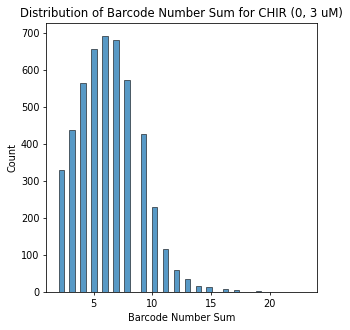

In [5]:
# Ensure correct DataFrame name
bc_df = sc_df[sc_df['BMP2 (ng/ml )'].isin([0, 16])].copy()

# Filter the barcode count column (assuming you want nonzero counts)
bc_count = bc_df['barcode_number sum']

# Plot histogram
plt.figure(figsize=(5,5), dpi = 70)
sns.histplot(bc_count)  # Adjust bins as needed
plt.xlabel('Barcode Number Sum')
plt.ylabel('Count')
plt.title('Distribution of Barcode Number Sum for CHIR (0, 3 uM)')
plt.show()


# Load the synthetic barcode 2 readout data

In [8]:
syn_df = pd.read_csv(data_path + 'Fig. 5/synthetic_BC2_reading_noise.csv')
syn_df

,label,area,centroid-0,centroid-1,bbox-0,bbox-1,bbox-2,bbox-3,mean_intensity_647,mean_intensity_546,...,barcode,editd positions,edit ratio,intensity_647,intensity_546,int_ratio,width,height,position_cell_label,mout avg
0,1,54,44.518519,411.370370,41,408,49,416,10383.685185,933.907407,...,000000000000',0,0.0,13.236975,10.828361,0.818039,8,8,1_1,0.098013
1,2,28,45.214286,1002.142857,43,1000,49,1006,10138.500000,997.178571,...,000000000000',0,0.0,12.556300,10.237134,0.815299,6,6,1_3,0.062742
2,3,13,48.615385,334.384615,47,333,51,337,11383.000000,963.000000,...,000000000000',0,0.0,11.904826,9.435003,0.792536,4,4,1_1,0.053372
3,5,10,64.200000,1757.500000,63,1756,66,1760,11248.000000,945.400000,...,000000000000',0,0.0,11.630531,9.154193,0.787083,3,4,1_7,0.071570
4,6,4,81.250000,1809.500000,80,1809,83,1811,10512.500000,949.250000,...,000000000000',0,0.0,10.646615,8.241967,0.774140,3,2,1_7,0.053376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30376,188,51,2043.784314,1266.666667,2040,1263,2048,1271,576.098039,8806.588235,...,111111111111',12,1.0,10.288103,13.015081,1.265061,8,8,7_38,11.647820
30377,189,34,2042.823529,1282.294118,2040,1280,2047,1286,441.000000,5236.000000,...,111111111111',12,1.0,9.615405,12.089674,1.257323,7,6,7_38,11.976638
30378,190,33,2045.484848,1134.666667,2043,1130,2048,1139,445.303030,5240.636364,...,111111111111',12,1.0,9.595263,12.060706,1.256944,5,9,7_38,11.991004
30379,191,28,2045.357143,1172.392857,2043,1169,2048,1176,482.107143,6038.964286,...,111111111111',12,1.0,9.510371,12.038192,1.265796,5,7,7_38,11.960903


# Notes for BMP-BC2 recording simulation
* Simulation recording with varied edit probability (from 0 to 1). 
* Simulations were performed either under the equal edit probability for all arrays in the same cell or with added normal noise to vary edit probability for different arrays of a cell, which keep the mean   of edit probability constant, and use the std to control the noise level, here varied from 0 to 0.35 as 0.01 interval.
* The barcode array number for each simulated cell is sampled from the single cell barcode array number distribution of BMP-BC1 experimental recording data
* 50 cells were simulated for each edit probability and barcode array number.


In [9]:
# Seed for reproducibility
np.random.seed(49)

# Number of barcodes per array
n = 12  

# Sample function to get 'corrected_mout avg' based on edited positions
def sample_CNN(edit_num):
    return syn_df.loc[syn_df['editd positions'] == edit_num]['mout avg'].sample(n=1).iloc[0]

# Vectorize the sample function
vec_func = np.vectorize(sample_CNN)

# List to store results
results = []

# Simulation loop

for z in np.linspace(0, 0.3, 31):

    for p in np.linspace(0, 1, 101):
        
        for s in range(50):
            # Generate random values clipped to the range [0, 1]
            bc = np.random.choice(bc_count)
            #std = z*p
            p_values = np.clip(np.random.normal(p, z, size=bc), 0, 1)  
            
            CNN_list_sc = []

            for p_value in p_values:
                # Simulate the binomial process
                sample = np.random.binomial(n, p_value, size=1)
                # Collect the sampled 'corrected_mout avg'
                CNN_list_sc.append(vec_func(sample))

            # Flatten the CNN_list_sc list and store results
            results.append((z, bc, p, s, np.mean(CNN_list_sc), np.std(CNN_list_sc)))

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['Noise','Barcode Count', 'Probability', 'Sample', 'Mean Mout Avg', 'Std Mout Avg'])

# Display the DataFrame
results_df

,Noise,Barcode Count,Probability,Sample,Mean Mout Avg,Std Mout Avg
0,0.0,5,0.0,0,0.083892,0.020982
1,0.0,6,0.0,1,0.064703,0.011230
2,0.0,3,0.0,2,0.064533,0.006150
3,0.0,11,0.0,3,0.164547,0.109707
4,0.0,4,0.0,4,0.075211,0.022305
...,...,...,...,...,...,...
156545,0.3,7,1.0,45,11.791821,0.199259
156546,0.3,4,1.0,46,11.581077,0.690284
156547,0.3,19,1.0,47,10.412405,2.358108
156548,0.3,2,1.0,48,11.925865,0.013877


In [11]:
#results_df.to_csv(data_path + 'simulated_BMP_BC2_recording.csv', index=False)

In [12]:
sc_syn_df = syn_df.groupby(['cell_line', 'position','cell_label', 'editd positions']).agg({
    'int_ratio': ['mean', 'std', lambda x: np.std(x) / np.mean(x) * 100],
    #'corrected_int_ratio': ['mean', 'std', lambda x: np.std(x) / np.mean(x) * 100],
    'mout avg': ['mean', 'std', lambda x: np.std(x) / np.mean(x) * 100],
    'barcode_number': 'sum'
}).reset_index()

# Flatten column names
sc_syn_df.columns = [' '.join(col).strip() for col in sc_syn_df.columns.values]

# Rename lambda columns
sc_syn_df = sc_syn_df.rename(columns={
    'int_ratio <lambda_0>': 'int_ratio CV',
    #'corrected_int_ratio <lambda_0>': 'corrected_int_ratio CV',
    'mout avg <lambda_0>': 'mout avg CV'
})

# Display the grouped DataFrame
sc_syn_df

,cell_line,position,cell_label,editd positions,int_ratio mean,int_ratio std,int_ratio CV,mout avg mean,mout avg std,mout avg CV,barcode_number sum
0,41,1,1,0,0.808717,0.014067,1.420273,0.076446,0.022358,23.880364,3
1,41,1,3,0,0.817977,0.009306,0.928904,0.094123,0.030730,26.657719,3
2,41,1,7,0,0.793795,0.013618,1.534456,0.062371,0.008514,12.208873,5
3,41,1,14,0,0.804534,0.012644,1.434624,0.077617,0.026449,31.107738,6
4,41,1,18,0,0.801445,0.017283,1.867548,0.188308,0.192300,88.438299,4
...,...,...,...,...,...,...,...,...,...,...,...
5057,85,7,76,11,1.132637,0.031268,2.254022,10.431416,0.566621,4.435105,3
5058,85,7,78,11,1.146262,0.022204,1.793388,10.315161,0.811536,7.283808,7
5059,85,7,80,11,1.165667,0.013996,0.980358,10.730182,0.206376,1.570390,3
5060,85,7,81,11,1.167944,0.015601,1.156830,11.142186,0.387019,3.008102,4


In [13]:
# Set the font properties
plt.rcParams.update({
    'font.family': 'Arial',     # Set the font family
    'font.size': 12,            # Set the base font size
    'axes.titlesize': 16,       # Set the font size of the axes title
    'axes.labelsize': 16,       # Set the font size of the x and y labels
    'xtick.labelsize': 12,      # Set the font size of the x tick labels
    'ytick.labelsize': 12,      # Set the font size of the y tick labels
    'legend.fontsize': 12,      # Set the font size of the legend
    'figure.titlesize': 16      # Set the font size of the figure title
})

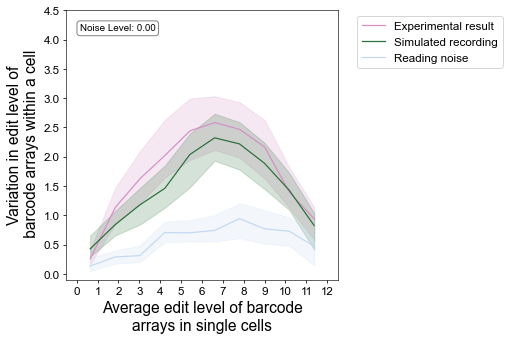

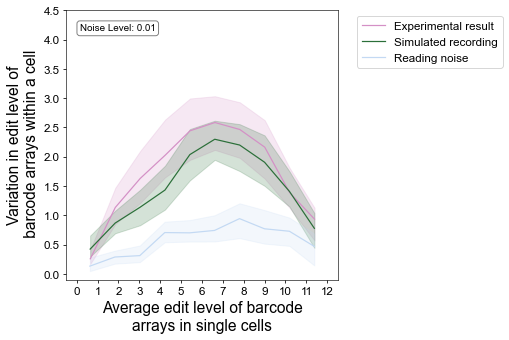

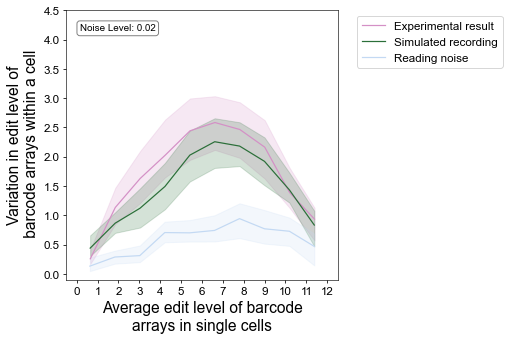

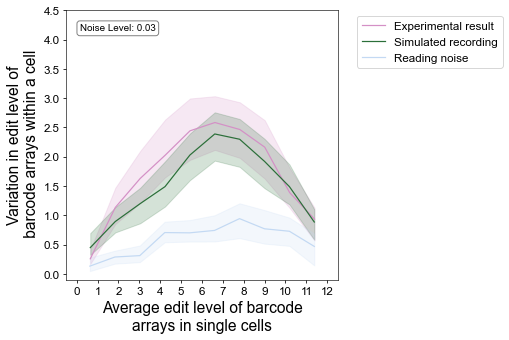

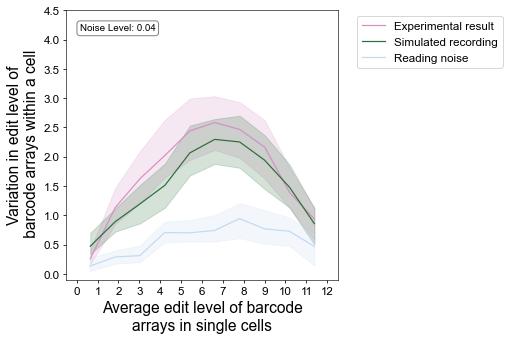

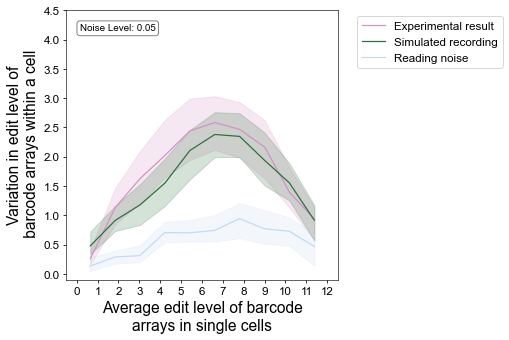

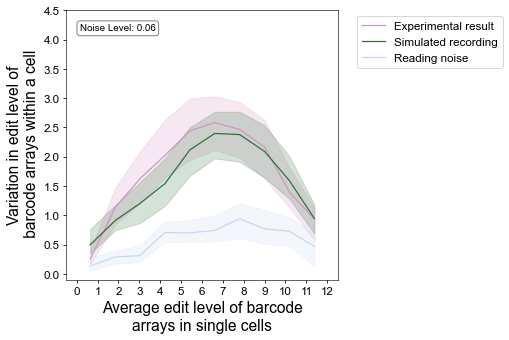

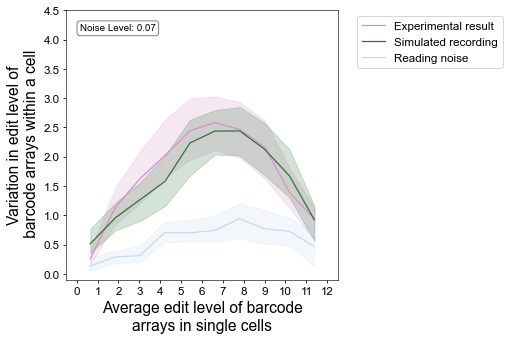

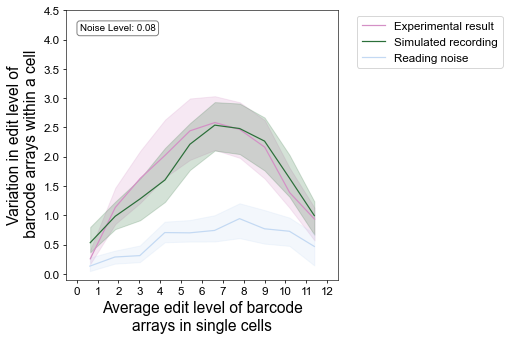

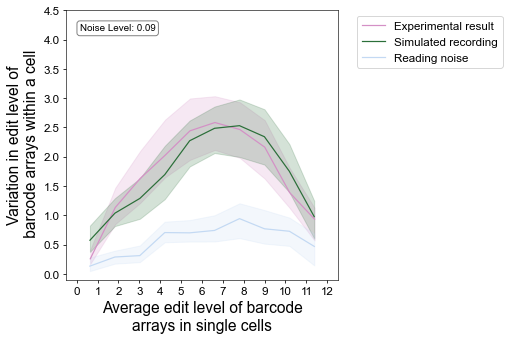

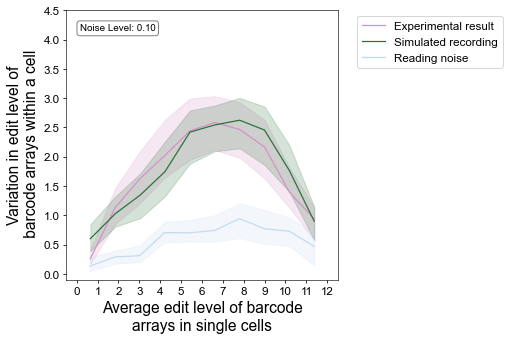

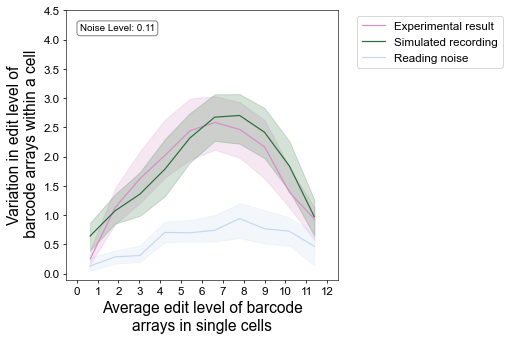

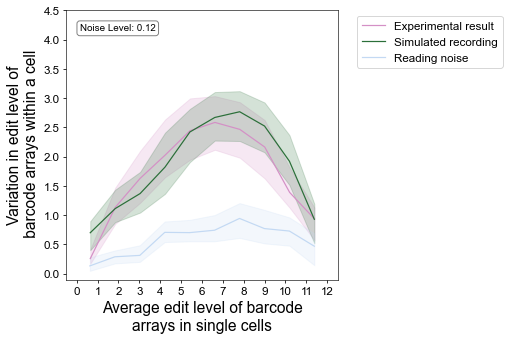

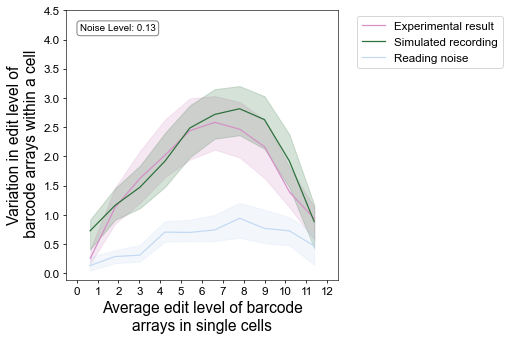

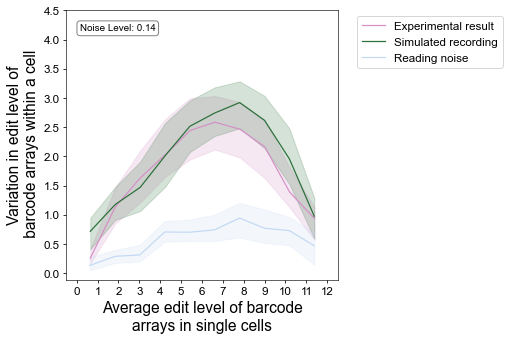

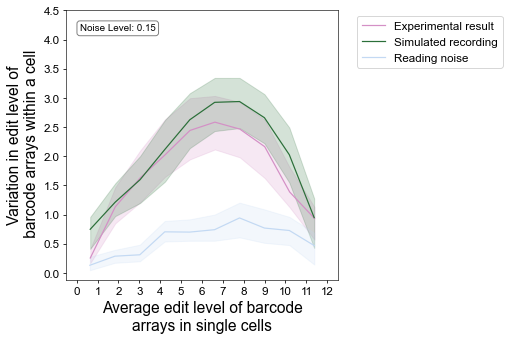

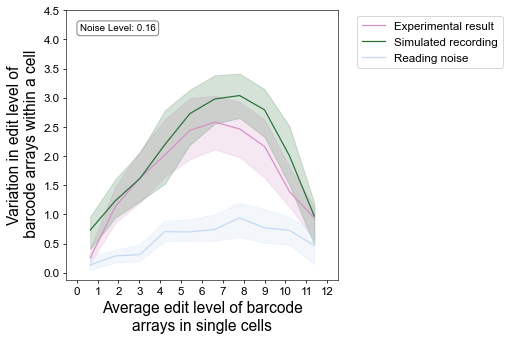

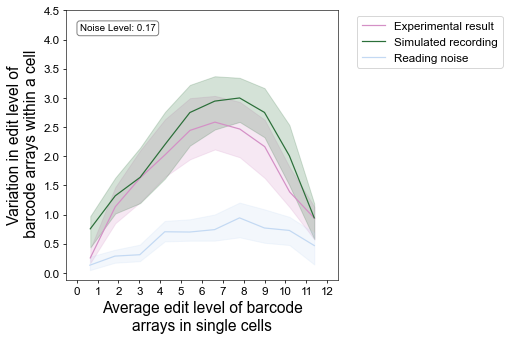

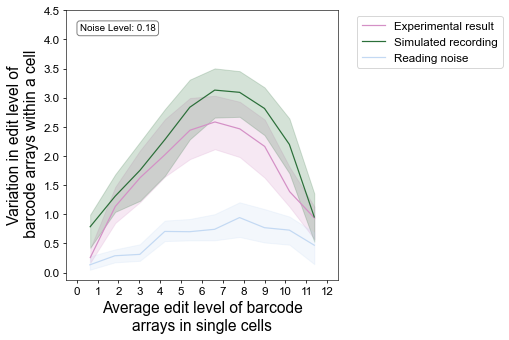

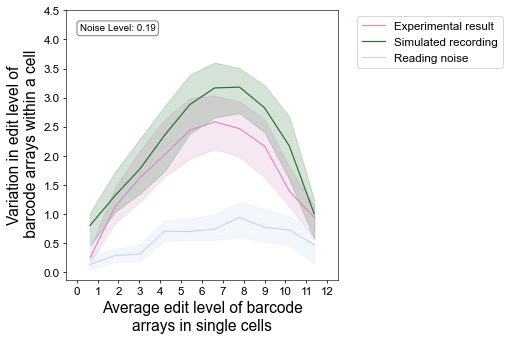

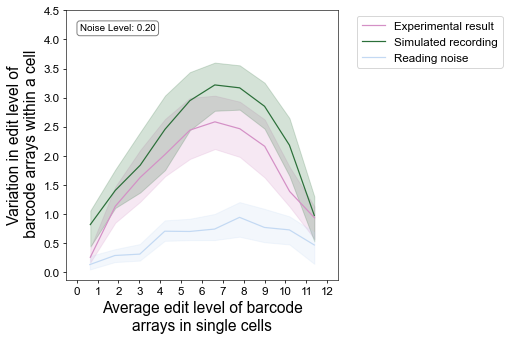

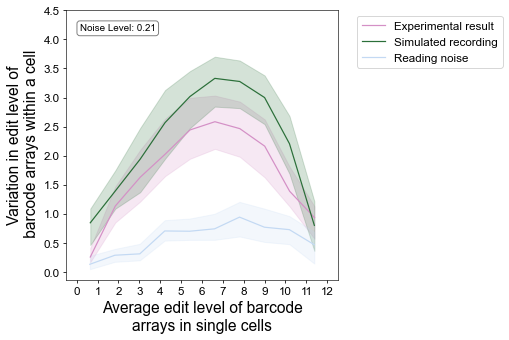

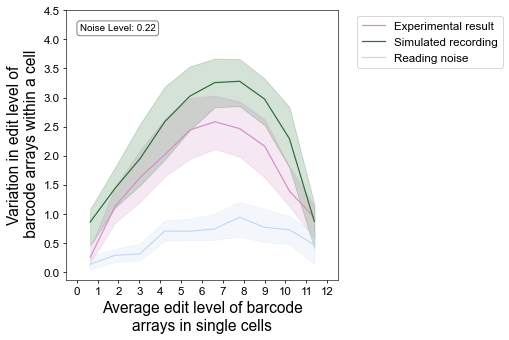

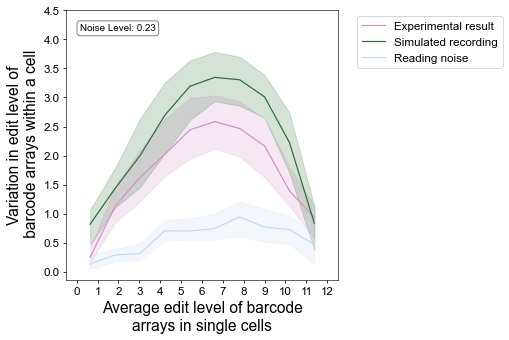

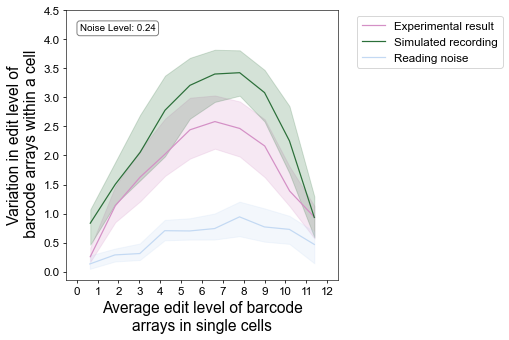

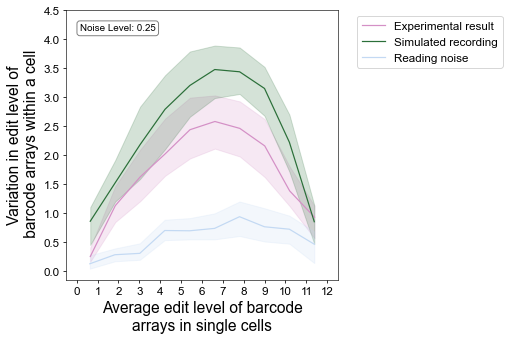

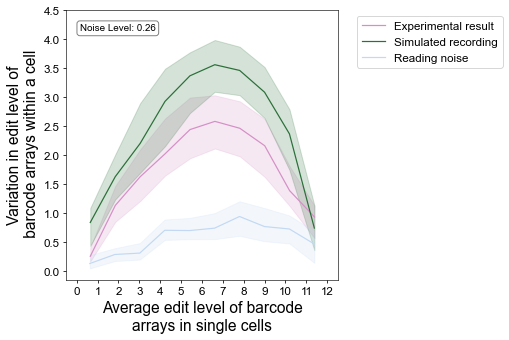

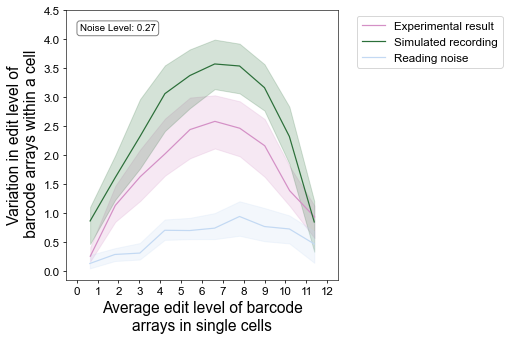

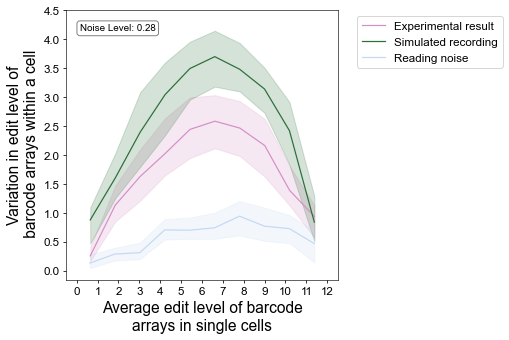

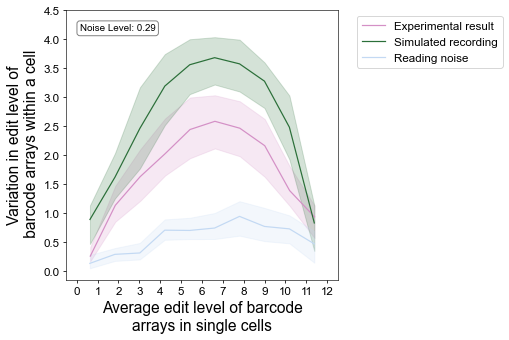

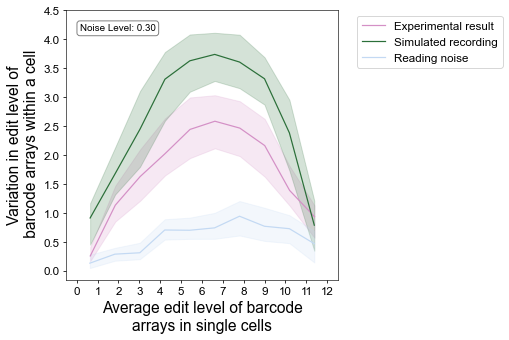

In [20]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate median and IQR for binned data and plot it
def plot_binned_median_iqr(df, x_col, y_col, color, label):
    df['binned'] = pd.cut(df[x_col], bins=10)
    median_df = df.groupby('binned')[y_col].median()
    q1_df = df.groupby('binned')[y_col].quantile(0.25)
    q3_df = df.groupby('binned')[y_col].quantile(0.75)
    bin_centers = [interval.mid for interval in median_df.index]
    
    # Plot IQR
    plt.fill_between(bin_centers, q1_df, q3_df, color=color, alpha=0.2)

    # Plot median
    plt.plot(bin_centers, median_df, color=color, linewidth=1.25, label=label)

custom_palette = sns.color_palette("cubehelix", 5)

# Copy the DataFrames
temp_df = sc_syn_df.copy()
temp_df_1 = pd.concat([
    sc_df.loc[sc_df['BMP2 (ng/ml )'] == 16],
    sc_df.loc[sc_df['BMP2 (ng/ml )'] == 0]
], ignore_index=True, sort=False).copy()


for z in np.linspace(0, 0.3, 31):
    
    temp_df_2 = results_df.loc[results_df['Noise']==z].copy()
    plt.figure(figsize=(5, 5), dpi=70)

    # Plot binned median and IQR for each DataFrame
    plot_binned_median_iqr(temp_df_1, 'mout avg mean', 'mout avg std', custom_palette[3], 'Experimental result')
    plot_binned_median_iqr(temp_df_2, 'Mean Mout Avg', 'Std Mout Avg', custom_palette[1], 'Simulated recording')
    plot_binned_median_iqr(temp_df, 'mout avg mean', 'mout avg std', custom_palette[4], 'Reading noise')

    # Labels and limits
    plt.xlabel('Average edit level of barcode\narrays in single cells')
    plt.ylabel('Variation in edit level of\n barcode arrays within a cell')
    plt.xlim([-0.5, 12.5])
    #plt.ylim([-0.5, 4.5])
    plt.yticks(np.arange(0, 5, 0.5))  # 0 to 12 with 1 interval
    plt.xticks(np.arange(0, 13, 1))  # 0 to 12 with 1 interval
    # Customize spines
    plt.gca().spines['top'].set_linewidth(0.625)
    plt.gca().spines['right'].set_linewidth(0.625)
    plt.gca().spines['bottom'].set_linewidth(0.625)
    plt.gca().spines['left'].set_linewidth(0.625)

    # Adjust legend
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=3)
    plt.text(0.05, 0.95, f'Noise Level: {z:.2f}', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', 
         bbox=dict(boxstyle='round,pad=0.3', edgecolor='gray', facecolor='white'))

    # Optional save path
    #save_path = os.path.join(data_dir, '240812_Wnt_BC1_readout&writing_noise_with_binned_IQR.svg')
    #plt.savefig(save_path, dpi=300, format='svg', transparent=True)

    plt.show()

# Fig 5F

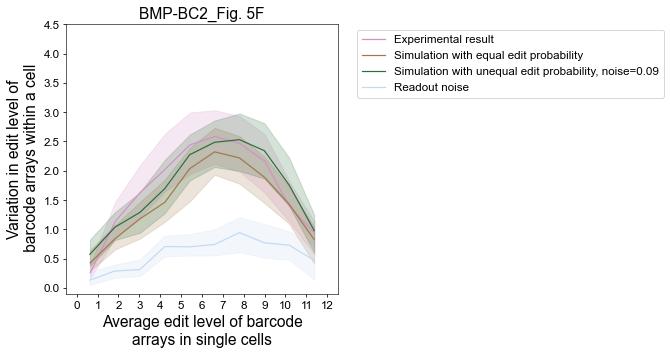

In [22]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5), dpi=70)

custom_palette = sns.color_palette("cubehelix", 5)

# Copy the DataFrames
temp_df = sc_syn_df.copy()
temp_df_1 = pd.concat([
    sc_df.loc[sc_df['BMP2 (ng/ml )'] == 16],
    sc_df.loc[sc_df['BMP2 (ng/ml )'] == 0]
], ignore_index=True, sort=False).copy()

temp_df_2 = results_df.loc[results_df['Noise'] == 0].copy()
temp_df_3 = results_df.loc[results_df['Noise'] == 0.09].copy()

# Scatter plots
#sns.scatterplot(data=temp_df_1, x='mout avg mean', y='mout avg std', alpha=0.75, s=6, edgecolor='none', color=custom_palette[3], label='writing+reading noise')
#sns.scatterplot(data=temp_df_2, y='Std Mout Avg', x='Mean Mout Avg', s=4, alpha=0.5, edgecolor='none', color=custom_palette[1], label='simulation+reading noise')
#sns.scatterplot(data=temp_df, x='mout avg mean', y='mout avg std', alpha=0.5, s=4, edgecolor='none', color=custom_palette[4], label='reading noise')

# Function to calculate median and IQR for binned data and plot it
def plot_binned_median_iqr(df, x_col, y_col, color, label):
    df['binned'] = pd.cut(df[x_col], bins=10)
    median_df = df.groupby('binned')[y_col].median()
    q1_df = df.groupby('binned')[y_col].quantile(0.25)
    q3_df = df.groupby('binned')[y_col].quantile(0.75)
    bin_centers = [interval.mid for interval in median_df.index]

    # Plot IQR
    plt.fill_between(bin_centers, q1_df, q3_df, color=color, alpha=0.2)

    # Plot median
    plt.plot(bin_centers, median_df, color=color, linewidth=1.25, label=label)

# Plot binned median and IQR for each DataFrame
plot_binned_median_iqr(temp_df_1, 'mout avg mean', 'mout avg std', custom_palette[3], 'Experimental result')
plot_binned_median_iqr(temp_df_2, 'Mean Mout Avg', 'Std Mout Avg', custom_palette[2], 'Simulation with equal edit probability')
plot_binned_median_iqr(temp_df_3, 'Mean Mout Avg', 'Std Mout Avg', custom_palette[1], 'Simulation with unequal edit probability, noise=0.09')
plot_binned_median_iqr(temp_df, 'mout avg mean', 'mout avg std', custom_palette[4], 'Readout noise')

# Labels and limits
plt.xlabel('Average edit level of barcode\narrays in single cells')
plt.ylabel('Variation in edit level of\n barcode arrays within a cell')
plt.xlim([-0.5, 12.5])
#plt.ylim([-0.5, 4.5])
plt.yticks(np.arange(0, 5, 0.5))  # 0 to 12 with 1 interval
plt.xticks(np.arange(0, 13, 1))  # 0 to 12 with 1 interval
# Customize spines
plt.gca().spines['top'].set_linewidth(0.625)
plt.gca().spines['right'].set_linewidth(0.625)
plt.gca().spines['bottom'].set_linewidth(0.625)
plt.gca().spines['left'].set_linewidth(0.625)

# Adjust legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=3)
plt.title('BMP-BC2_Fig. 5F')
# Optional save path
#save_path = os.path.join(data_dir, '240812_BMP_BC1_readout&writing_noise_with_binned_IQR.svg')
#plt.savefig(save_path, dpi=300, format='svg', transparent=True)

plt.show()